# Lesson 06: Neutron Captures
### Dylan Temples 
June 20, 2022

The goal of this lesson is to do a back-of-the-envelope calculation for Sb neutron capture for DD neutrons. Increasing levels of complexity are applied.

## Learning Objectives
Physics Topics:
- Neutron capture
- Interaction rate calculation

Programming Topics:
- Interpolation
- Distributions, sampling

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Rate Calculations
One way to express the rate of some interaction occurring, is through the expression $$ \Gamma = n \sigma v $$ where $\Gamma$ is the rate (interactions per unit time), $n$ is the density of particles entering the interaction volume, and $v$ is the velocity of the incident particles with respect to the target. The interaction is characterized by its cross-section $\sigma$ that defines an effective area for the interaction to occur. You can think of it as the area in which the two particles must inhabit simultaneously for an interaction to take place. It has units of area (*e.g.*, cm$^{2}$). 

Alternatively, we can write this as $$ \gamma = \Phi \sigma \rho $$ where now $\gamma$ is the rate per unit volume, $\Phi$ is the neutron flux, and $\rho$ is the number density of scattering targets (in our case Sb nuclei). In this case, we can multiply both sides by the volume of our target, to get $$ \Gamma = \Phi \sigma N $$ where $N$ is the total number of nuclei available to interact with. We'll stick to this formalism for the work below.

In this excercise, we will consider a toy model of a point source of deuterium-deuterium fusion events, creating an isotropic source of 2.45 MeV neutrons. They will be incident on a sample composed of 57% $^{121}$Sb and 43% $^{123}$Sb by number. We want to determine the final activity of the radioisotopes $^{122}$Sb and $^{124}$Sb.

## Toy Geometry
We will consider an infinitesimal point source of DD neutrons at the center of a sphere of radius 10 cm. The sphere is hollow and evacuated within this radius, and beyond that radius it is a perfect absorber of neutrons. The target is a 1 gram sphere of $^{nat}$Sb. The target is 5 cm from the source along the positive $z$ axis.

## Antimony volume and neutron flux
### Exercise 1:
First, we should determine what the size of our Sb target is. Given the parameters defined in the next cell, you should create three functions in the following cell: (1) `SbVolume`, which takes a mass in grams as the argument and returns the volume, in cm$^3$ of that mass if it were spherically shaped; (2) `SbRadius`, which takes the same argument, and returns the radius, in cm, of the Sb sphere; and (3) `SbCircle`, which gives the area, in cm$^2$ of a circle with that radius (this would be the cross-sectional area, i.e., the area of a circular shadow projected by a sphere by perfectly parallel light). 

In [83]:
Sb_density_g_cm3 = 6.697 ## At room temperature
Sb_f121 = 0.5721
Sb_f123 = 0.4279

In [66]:
def SbVolume(Sb_mass_g):
    
    SbSphereVol_cm3 = Sb_mass_g / Sb_density_g_cm3
    
    return SbSphereVol_cm3

def SbRadius(Sb_mass_g):
    
    SbSphereRad_cm = np.power( (3./(4.*np.pi)) * SbVolume(Sb_mass_g) , 1./3.)
    
    return SbSphereRad_cm

def SbCircle(Sb_mass_g):
    
    SbSphereXAr_cm2 = np.pi * np.power( SbRadius(Sb_mass_g) ,2.)
    
    return SbSphereXAr_cm2

### Question 1: 
What is the cross-sectional area of a sphere that contains 1g of Sb? Then, do the math backwards to calculate the mass and check your answer. How close did you get? Is this an acceptable margin of error?

In [67]:
m_Sb_g = 1.0
print(m_Sb_g, "grams of natural Sb corresponds to:")
print("A volume of", SbVolume(m_Sb_g), "cm^3")
print("A radius of", SbRadius(m_Sb_g), "cm")
print("And a cross-sectional area of", SbCircle(m_Sb_g), "cm^2")

1.0 grams of natural Sb corresponds to:
A volume of 0.1493205913095416 cm^3
A radius of 0.32911198449008494 cm
And a cross-sectional area of 0.34028066056503664 cm^2


In [68]:
A = SbCircle(m_Sb_g)   ## Area [cm^2]
r = np.sqrt(A/np.pi)   ## Radius [cm]
V = (4./3.)*np.pi*np.power(r,3.)   ## Volume [cm^3]
m = V*Sb_density_g_cm3 ## Mass [g]
print("Back-calculation gives:",m,"grams")
print("Percent error:", 100*(m-m_Sb_g)/m_Sb_g)

Back-calculation gives: 1.0000000000000004 grams
Percent error: 4.440892098500626e-14


### Question 1.33:
What is the number density (#/cm$^3$) of Sb atoms of each isotope in the sample? The molar mass of Sb is 121.76 g/mol.

In [85]:
MM_Sb_g_mol = 121.76
mol         = 6.02e23

In [86]:
## In one gram there is how many moles:
num_mol_Mass = m_Sb_g / MM_Sb_g_mol
num_atom_Sb  = mol * num_mol_Mass
Sb_num_dens  = num_atom_Sb / SbVolume(m_Sb_g)
Sb121_n_dens = Sb_f121 * Sb_num_dens
Sb123_n_dens = Sb_f123 * Sb_num_dens
print("In a packed sphere of Sb weighing", m_Sb_g, "gram, there are", num_atom_Sb, "Sb atoms")
print("This is a number density of", Sb_num_dens, "atoms/cm^3")
print("121Sb density: ",Sb121_n_dens,"cm^-3")
print("123Sb density: ",Sb123_n_dens,"cm^-3")

In a packed sphere of Sb weighing 1.0 gram, there are 4.944152431011827e+21 Sb atoms
This is a number density of 3.3110988830486202e+22 atoms/cm^3
121Sb density:  1.8942796709921156e+22 cm^-3
123Sb density:  1.4168192120565046e+22 cm^-3


### Question 1.66:
How many nuclei of each isotope are there in our sample?

In [87]:
Sb121_N = Sb_f121 * num_atom_Sb
Sb123_N = Sb_f123 * num_atom_Sb
print("In a packed sphere of Sb weighing", m_Sb_g, "gram, there are", num_atom_Sb, "Sb atoms")
print(Sb121_N,"of which are 121Sb")
print(Sb123_N,"of which are 121Sb")

In a packed sphere of Sb weighing 1.0 gram, there are 4.944152431011827e+21 Sb atoms
2.8285496057818665e+21 of which are 121Sb
2.1156028252299607e+21 of which are 121Sb


### Question 2: 
Now we want to know how many neutrons are going to hit that area per unit time. The neutrons are going out equally in every direction from the center of the aborbing sphere. If the total production rate of neutrons is known, what is the number of neutrons crossing through every square centimeter of the aborbing surface, per second? This quantity is known as the flux, $\Phi$ and has units of cm$^{-2} \times $sec$^{-1}$.

In [69]:
r_Abs_cm = 10.0  # cm
R_n_psec = 1e8   # neutrons / sec, isotropically

In [70]:
def TotalNeutronFlux(generation_rate_Hz, absorber_radius_cm):
    
    flux_cm2_sec = generation_rate_Hz / (4.*np.pi*np.power(absorber_radius_cm,2.))
    
    return flux_cm2_sec

In [71]:
print("A rate of ",R_n_psec,"neutrons per seconds")
print("gives a total flux at the absorber of",TotalNeutronFlux(R_n_psec,r_Abs_cm),"n/cm^2/sec")

A rate of  100000000.0 neutrons per seconds
gives a total flux at the absorber of 79577.47154594767 n/cm^2/sec


### Question 3:
How many neutrons per second are incident on the Sb sphere? Related question: What fraction of the surface area of a sphere who's surface is at the distance of the Sb chunk does the cross-sectional area of the Sb chunk comprise?

In [73]:
## The total neutron flux at a distance of the source
Sb_src_dist_z_cm   = 5.0     ## units = cm
tot_n_flux_cm2_sec = TotalNeutronFlux(R_n_psec, Sb_src_dist_z_cm) ## units = cm^-2 sec^-1
xsec_Sb_area_cm2   = SbCircle(m_Sb_g) ## units = cm^2
n_rate_in_Sb       = xsec_Sb_area_cm2 * tot_n_flux_cm2_sec
print("For a spherical chunk of Sb with mass",m_Sb_g,"gram, the number of incident neutrons is", n_rate_in_Sb, "per second.")

For a spherical chunk of Sb with mass 1.0 gram, the number of incident neutrons is 108314.69833500193 per second.


## Interaction cross-sections
Before we move on, we'll want to know what the neutron capture cross sections are for our two isotopes of interest. First, we'll have to get the data. Head over to https://www.nndc.bnl.gov/sigma/, and click "Sb" on the periodic table. Click on "121" below "Results for Z=51" on the right. Find the $(n,\gamma)$ entry, and click "Plot". On the new page that opened, you should see a plot of cross-section vs energy. Click "View evaluated data", then right-click on the "Text" link to save the file to this directory on your computer. The default file name is `endf-6[29111].txt`. Do the same for $^{123}$Sb (filename `endf-6[33736].txt`).

### Exercise 2:
Create a function that takes in one of the filenames for the data downloaded from NNDC and recreates the plot shown on the website. However, your plot should have the axes in units of "MeV" and "cm$^2$" (rather than "barns" and "eV"). Make both those plots.

In [37]:
b_to_cm2  = 1e-24 ## 1 barn = 10^-28 m^2 = 10^-24 cm^2
eV_to_MeV = 1e-6  ## 1 eV = 10^-6 MeV

In [38]:
def MakeCrossSectionPlot(filename, pMeV=False):
    ## Pull the data from the fle, skipping the header
    data = np.loadtxt(filename, delimiter=",", skiprows=1)
    
    ## Now pull the header line to create the plot title
    firstline = None
    with open(filename) as f:
        firstline = f.readline().rstrip()
        
    iso_pts = firstline.split("(")[0].split("-")
    iso_str = r"$^{"+iso_pts[2]+"}_{"+iso_pts[0]+"}$"+iso_pts[1]
    int_pts = firstline.split("(")[1].split(")")[0].split(",")
    int_str = r"($"+int_pts[0]+",\\"+int_pts[1].replace(";","").replace("&","")+"$)"
    
    fig = plt.figure()
    ax0 = fig.gca()
    
    if pMeV:
        ax0.plot(data[:,0]*eV_to_MeV,data[:,1]*b_to_cm2,'b-')
        ax0.set_xlabel("Energy [MeV]")
        ax0.set_ylabel(r"Cross-section [cm$^2$]")
    else:
        ax0.plot(data[:,0],data[:,1],'b-')
        ax0.set_xlabel("Energy [eV]")
        ax0.set_ylabel(r"Cross-section [b]")
                                                                    
    ax0.set_title(iso_str+" "+int_str)

    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.grid(True)  

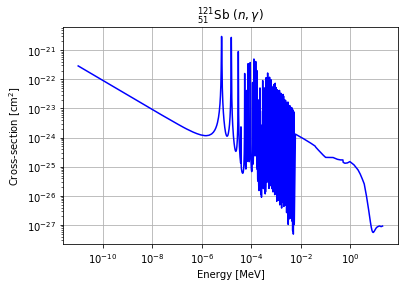

In [39]:
MakeCrossSectionPlot("endf-6[29111].txt", pMeV=True)

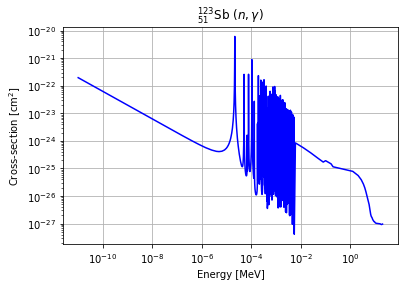

In [40]:
MakeCrossSectionPlot("endf-6[33736].txt", pMeV=True)

### Excercise 3:
Use `scipy.interpolate.interp1d` to create an interpolating function for each of the files, which exist as discrete data points sampled at various energy values. This will allow us to get a single value for the cross-section at any energy we can ask for, by linearly interpolating from the values in the data on either side of the energy we requested. Create a new version of, or edit, the function above to return the interpolator object. We want the interpolator to return $\sigma_{(n,\gamma)}$ in cm$^2$ as a function of $E_n$ in MeV.

In [42]:
from scipy.interpolate import interp1d

In [49]:
def MakeCrossSectionPlot(filename, pMeV=False):
    ## Pull the data from the fle, skipping the header
    data = np.loadtxt(filename, delimiter=",", skiprows=1)
    
    ## Now pull the header line to create the plot title
    firstline = None
    with open(filename) as f:
        firstline = f.readline().rstrip()
        
    iso_pts = firstline.split("(")[0].split("-")
    iso_str = r"$^{"+iso_pts[2]+"}_{"+iso_pts[0]+"}$"+iso_pts[1]
    int_pts = firstline.split("(")[1].split(")")[0].split(",")
    int_str = r"($"+int_pts[0]+",\\"+int_pts[1].replace(";","").replace("&","")+"$)"
    
    fig = plt.figure()
    ax0 = fig.gca()
    
    if pMeV:
        ax0.plot(data[:,0]*eV_to_MeV,data[:,1]*b_to_cm2,'b-')
        ax0.set_xlabel("Energy [MeV]")
        ax0.set_ylabel(r"Cross-section [cm$^2$]")
    else:
        ax0.plot(data[:,0],data[:,1],'b-')
        ax0.set_xlabel("Energy [eV]")
        ax0.set_ylabel(r"Cross-section [b]")
                                                                    
    ax0.set_title(iso_str+" "+int_str)

    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.grid(True)  
    
    ## Create and return the interpolator
    return interp1d(data[:,0]*eV_to_MeV,data[:,1]*b_to_cm2)

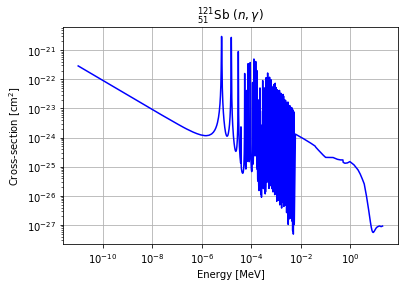

In [54]:
Sb121_xsec_intp = MakeCrossSectionPlot("endf-6[29111].txt", pMeV=True)

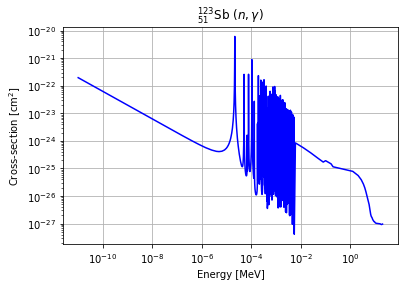

In [53]:
Sb123_xsec_intp = MakeCrossSectionPlot("endf-6[33736].txt", pMeV=True)

### Question 4:
What are the $(n,\gamma)$ cross-sections (in cm$^2$) for each Sb isotope at the DD neutron energy of $E_n=2.45$ MeV?

In [52]:
print("For 121Sb, the neutron capture cross-section is", Sb121_xsec_intp(2.45) , "cm^2")
print("For 123Sb, the neutron capture cross-section is", Sb123_xsec_intp(2.45) , "cm^2")

For 121Sb, the neutron capture cross-section is 5.873756247561623e-26 cm^2
For 123Sb, the neutron capture cross-section is 4.596663636363635e-26 cm^2


You'll notice these are very small compared to the range of values shown on the plots' y-axes. This means the Sb is very unlikley to capture neutrons of this energy. It demonstrates the need to moderate these neutrons, meaning they must go through some scattering processes to reduce their kinetic energy. For now we will continue with these values.

## The neutron energy
A particle of mass $m$ moving at a velocity $v$ has kinetic energy given by $$T=\frac12 m v^2$$ Typically, you'd think of the mass in units of kg and the velocity in meters per second, to work in MKS units (SI). One can do a neat trick where we multiply and divide the right hand side of the above equation by $c^2$: $$ T = \frac12 m v^2 \left(\frac{c^2}{c^2}\right) = \frac12 (mc^2) \left( \frac{v}{c} \right)^2 $$. This lets us write the kinetic energy in terms of the rest mass (energy) of the particle, and its velocity relative to the speed of light: $\beta = v/c$.

### Exercise 4:
Write a function that gives you the velocity of a neutron, as a fraction of the speed of light, with a specified kinetic energy.

### Question 5:
The neutron mass in MeV/$c^2$ is given below. What is the velocity, in terms of the speed of light, of a DD neutron with 2.45 MeV of kinetic energy?

In [76]:
M_neutron_MeV = 939.565420

$$ 2 T = (m_n c^2) \beta^2 \to \beta = \sqrt{2 T / (m_n c^2)} $$

In [80]:
def NeutronVelocity(E_neutron_MeV):
    
    beta = np.sqrt(2*E_neutron_MeV/M_neutron_MeV)
    
    return beta

In [81]:
beta_DD = NeutronVelocity(2.45)
print("The velocity of a neutron with", 2.45, "MeV of kinetic energy is", 100.*beta_DD, "% the speed of light (beta="+str(beta_DD)+")")

The velocity of a neutron with 2.45 MeV of kinetic energy is 7.221618263003493 % the speed of light (beta=0.07221618263003493)


## Putting it all Together
Let's return to our rate equation: $$ \Gamma  = \Phi \sigma N $$ where $\Phi$ is the flux with dimension number per unit area per unit time, $\sigma$ is the interaction cross-section with units of area, and $N$ is the number of target particles. Putting this all together, we see that $\Gamma$ has dimension of number per unit time, or in other words, a rate. 

### Question 6:
What is the rate of captures on $^{121}$Sb and $^{122}$Sb?

In [88]:
Sb121_cap_rate = TotalNeutronFlux(R_n_psec, Sb_src_dist_z_cm) * Sb121_xsec_intp(2.45) * Sb121_N
Sb123_cap_rate = TotalNeutronFlux(R_n_psec, Sb_src_dist_z_cm) * Sb123_xsec_intp(2.45) * Sb123_N
print("For this source and target, there are", Sb121_cap_rate, "122Sb activations per second")
print("For this source and target, there are", Sb123_cap_rate, "124Sb activations per second")

For this source and target, there are 52.88467586500974 122Sb activations per second
For this source and target, there are 30.95472789768153 124Sb activations per second


### Question 7:
In one second of neutron exposure, assuming no unstable nuclei decay during the exposure, what is the final activity (in units of Becquerel) for both isotopes of interest? Note $$ A_{Bq} = n N_A \frac{ \log{2} }{ t_{1/2} } $$ where $n$ is the number of moles of the decaying particle that are present in the sample, $N_A$ is Avogradro's number, and $t_{1/2}$ is the half-life of the decaying species. Leading question: what is $n N_A$ equal to? (You've already calculated it) 

In [92]:
tau_122Sb_sec =  2.7238 * 24. * 3600.
tau_124Sb_sec = 60.20   * 24. * 3600.

In [93]:
def Activity_Bq(N_decayers, t12_sec):
    return N_decayers * np.log(2.) / t12_sec

In [94]:
print("In a one second exposure with no decays, the final activities are")
print("122Sb:", Activity_Bq(Sb121_cap_rate*1.0, tau_122Sb_sec), "Bq")
print("124Sb:", Activity_Bq(Sb123_cap_rate*1.0, tau_124Sb_sec), "Bq")

In a one second exposure with no decays, the final activities are
122Sb: 0.00015576373409195013 Bq
124Sb: 4.125173489463792e-06 Bq


### Question 8:
If we wanted a $^{124}$Sb source with a total activity of 50 kBq, how long would we need to expose the sample to neutrons, again assuming no decays during exposure? Is this reasonable to do?

In [96]:
factor_sec = 50e3 / Activity_Bq(Sb123_cap_rate, tau_124Sb_sec)
print("124Sb:", Activity_Bq(Sb123_cap_rate*factor_sec, tau_124Sb_sec), "Bq")
print("In",factor_sec,"seconds","(days="+str(factor_sec/(24.*3600.))+")","(years="+str(factor_sec/(365.25*24.*3600.))+")")

124Sb: 50000.0 Bq
In 12120702348.08457 seconds (days=140285.90680653436) (years=384.08188037381075)
